In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse.linalg import svds
import umap
import warnings
warnings.filterwarnings('ignore')

In [2]:
ratings_df = pd.read_csv('Data/Recommendation engine/ml-1m/ratings.dat', 
                         sep='::', 
                         names=['userID','movieID','rating','timestamp'], 
                         engine='python')
ratings_df.drop('timestamp', axis = 1, inplace=True)
ratings_df.head()

,userID,movieID,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


In [3]:
movies_df = pd.read_csv('Data/Recommendation engine/ml-1m/movies.dat', 
                         sep='::',
                         names=['movieID', 'movie', 'genre'],
                         engine='python')
movies_df.head()

,movieID,movie,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings = ratings_df.merge(movies_df,on='movieID')
assert ratings.shape[0] == ratings_df.shape[0], 'Error in merge operation'
ratings.drop(['genre','movieID'],axis=1,inplace=True)
ratings.head()

,userID,rating,movie
0,1,5,One Flew Over the Cuckoo's Nest (1975)
1,2,5,One Flew Over the Cuckoo's Nest (1975)
2,12,4,One Flew Over the Cuckoo's Nest (1975)
3,15,4,One Flew Over the Cuckoo's Nest (1975)
4,17,5,One Flew Over the Cuckoo's Nest (1975)


In [5]:
ratings_matrix = ratings.pivot('userID', 'movie', 'rating') 
ratings_matrix.head()

movie,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kj�rlighetens kj�tere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
userID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
ratings_mean = ratings_matrix.mean(axis=0)
ratings_centered = ratings_matrix - ratings_mean
ratings_centered.head()

movie,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kj�rlighetens kj�tere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
userID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
temp = ratings_centered.fillna(0)
U,S,Vt = svds(temp.values, k=50)

In [8]:
movies_list = ['Batman Forever (1995)', 
               'Batman & Robin (1997)', 
               '101 Dalmatians (1996)', 
               '2001: A Space Odyssey (1968)',
               'Home Alone 3 (1997)',
               'Field of Dreams (1989)', 
               'Dead Poets Society (1989)', 
               'Pulp Fiction (1994)',  
               'Good Will Hunting (1997)',
               'Annie Hall (1977)', 
               'Terminator 2: Judgment Day (1991)',
               'Die Hard (1988)',
               'Silence of the Lambs, The (1991)']

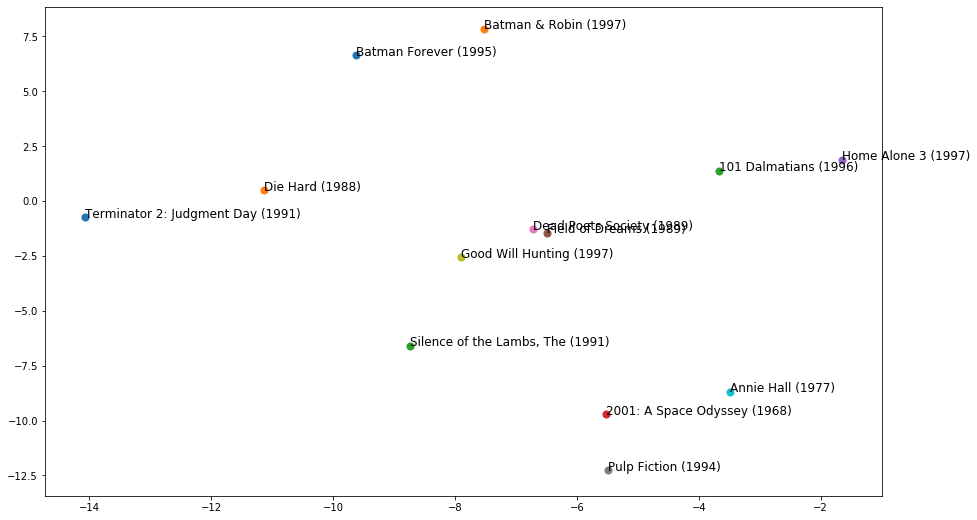

In [9]:
fig, ax = plt.subplots(figsize=(15,9))
movie_names = ratings_matrix.columns.values

for i in movies_list:
    idx = np.where(movie_names==i)[0][0]
    ax.scatter(S[-1]*Vt.T[idx,-1], S[-2]*Vt.T[idx,-2], s=50)
    ax.annotate(i, (S[-1]*Vt.T[idx,-1], S[-2]*Vt.T[idx,-2]), size=12)

In [10]:
trans = umap.UMAP(n_neighbors=10, random_state=42, metric='euclidean').fit(np.matmul(np.diag(S),Vt).T)

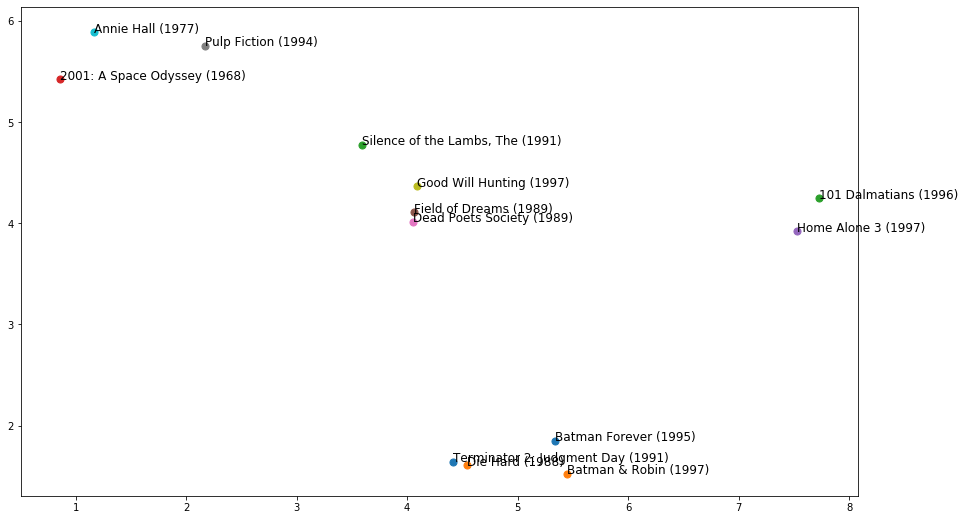

In [11]:
fig, ax = plt.subplots(figsize=(15,9))
movie_names = ratings_matrix.columns.values

for i in movies_list:
    idx = np.where(movie_names==i)[0][0]
    ax.scatter(trans.embedding_[idx,0], trans.embedding_[idx,1], s=50)
    ax.annotate(i, (trans.embedding_[idx,0], trans.embedding_[idx,1]), size=12)